### Pharmaceutical Sales prediction across multiple stores Project

#### Exploratory data analysis (EDA)

#### Importing the relevant libraries

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import sys
from IPython.display import Markdown, display, Image
import numpy as np
import pandas as pd
import random
import math
sys.path.append(os.path.abspath(os.path.join('../scripts')))
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from collections.abc import Mapping

Loading the data

In [4]:
store_df = pd.read_csv(r'C:\Users\Dell\Desktop\Next Hikes Project_06\store.csv', na_values=['?', None, 'undefined'])
df_train = pd.read_csv(r'C:\Users\Dell\Desktop\Next Hikes Project_06\train.csv', na_values=['?', None, 'undefined'])
test_df = pd.read_csv(r'C:\Users\Dell\Desktop\Next Hikes Project_06\test.csv', na_values=['?', None, 'undefined'])
sample_df = pd.read_csv(r'C:\Users\Dell\Desktop\Next Hikes Project_06\sample_submission.csv', na_values=['?', None, 'undefined'])

Inspecting the data

1. Train data

In [5]:
df_train.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


In [6]:
df_train.shape

(1017209, 9)

In [7]:
#Checking missing values 
df_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Note: There is not missing value in train dataset.

2. Test data

In [8]:
test_df.head(3)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0


In [9]:
test_df.shape

(41088, 8)

In [10]:
test_df.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [11]:
test_df['Open'] = test_df['Open'].fillna(method='ffill')

In [12]:
test_df.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Store Data

In [13]:
store_df.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [14]:
store_df.shape

(1115, 10)

In [15]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Info About Datasets

In [16]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41088 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


View Null Columns count

And Handle the missing value in store dataset.

In [19]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [20]:
# No particular pattern observed. In this case, it makes a complete sense to replace NaN with the median values
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

In [21]:
store_df.fillna(0, inplace = True)
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Note:Now there is no missing value in store dataset.

## Field Ddescriptions 

__Id__ - an Id that represents a (Store, Date) duple within the test set

__Store__ - a unique Id for each store

__Sales__ - the turnover for any given day (this is what you are predicting)

__Customers__ - the number of customers on a given day

__Open__ - an indicator for whether the store was open: 0 = closed, 1 = open

__StateHoliday__ - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

__SchoolHoliday__ - indicates if the (Store, Date) was affected by the closure of public schools

__StoreType__ - differentiates between 4 different store models: a, b, c, d

__Assortment__ - describes an assortment level: a = basic, b = extra, c = extended. Read more about assortment here

__CompetitionDistance__ - distance in meters to the nearest competitor store

__CompetitionOpenSince[Month/Year]__ - gives the approximate year and month of the time the nearest competitor was opened

__Promo__ - indicates whether a store is running a promo on that day

__Promo2__ - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

__Promo2Since[Year/Week]__ - describes the year and calendar week when the store started participating in Promo2

__PromoInterval__ - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


### Merging 'train.csv' and 'store.csv'

Both dataset have common column 'store'

We use that column to merge store into train dataset

In [22]:
import pandas as pd

# Read the CSV files
train = pd.read_csv(r'C:\Users\Dell\Desktop\Next Hikes Project_6\train.csv', parse_dates=[2], index_col='Date')
store = pd.read_csv(r'C:\Users\Dell\Desktop\Next Hikes Project_6\store.csv', low_memory=False)

# Extract year, month, day, and week
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['Dates'] = train.apply(lambda x: '%s-%s-%s' % (x['Year'], x['Month'], x['Day']), axis=1)
train['Dates'] = pd.to_datetime(train['Dates'])

# Merge train and store DataFrames
train_store = pd.merge(train, store, how='inner', on='Store')

# Now train_store contains the merged DataFrame
train_store

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,2015-07-31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,5020,546,1,1,0,1,2015,7,...,2015-07-30,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,4782,523,1,1,0,1,2015,7,...,2015-07-29,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,5011,560,1,1,0,1,2015,7,...,2015-07-28,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,6102,612,1,1,0,1,2015,7,...,2015-07-27,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771,339,1,0,0,1,2013,1,...,2013-01-05,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,4540,326,1,0,0,1,2013,1,...,2013-01-04,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,4297,300,1,0,0,1,2013,1,...,2013-01-03,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,3697,305,1,0,0,1,2013,1,...,2013-01-02,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [23]:
train_store

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,2015-07-31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,5020,546,1,1,0,1,2015,7,...,2015-07-30,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,4782,523,1,1,0,1,2015,7,...,2015-07-29,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,5011,560,1,1,0,1,2015,7,...,2015-07-28,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,6102,612,1,1,0,1,2015,7,...,2015-07-27,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771,339,1,0,0,1,2013,1,...,2013-01-05,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,4540,326,1,0,0,1,2013,1,...,2013-01-04,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,4297,300,1,0,0,1,2013,1,...,2013-01-03,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,3697,305,1,0,0,1,2013,1,...,2013-01-02,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


### Data wrangling begins here..

Descriptive statistics are very useful for initial exploration of the variables By default, only descriptives for the numerical variables are shown To include the categorical ones, you should specify this with an argument Note that categorical variables don't have some types of numerical descriptives and numerical variables don't have some types of categorical descriptives

In [24]:
#Checkinig the missing values
train_store.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
Year                              0
Month                             0
Day                               0
Dates                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

### Competition Distance

Before deciding how to treat this,we know there are infinite ways of filling missing values. The most common and simplistic approach is to fill it with either the mean or the median of this variable.

In [25]:
train_store[pd.isnull(train_store.CompetitionDistance)].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
263244,291,5,10052,973,1,1,0,1,2015,7,...,2015-07-31,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
263245,291,4,9030,883,1,1,0,1,2015,7,...,2015-07-30,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
263246,291,3,8204,814,1,1,0,1,2015,7,...,2015-07-29,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
263247,291,2,10374,943,1,1,0,1,2015,7,...,2015-07-28,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
263248,291,1,11692,1086,1,1,0,1,2015,7,...,2015-07-27,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN


In [26]:
df_store_check_distribution=train_store.drop(train_store[pd.isnull(train_store.CompetitionDistance)].index)
df_store_check_distribution.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,2015-07-31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,5020,546,1,1,0,1,2015,7,...,2015-07-30,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,4782,523,1,1,0,1,2015,7,...,2015-07-29,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,5011,560,1,1,0,1,2015,7,...,2015-07-28,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,6102,612,1,1,0,1,2015,7,...,2015-07-27,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [27]:
train_store.to_csv("train_store_clean_data.csv")

* Let's quickly have a look at those metrics.

{'Mean': 5430.085652302903,
 'Median': 2330.0,
 'Standard Dev': 7715.319897995119}

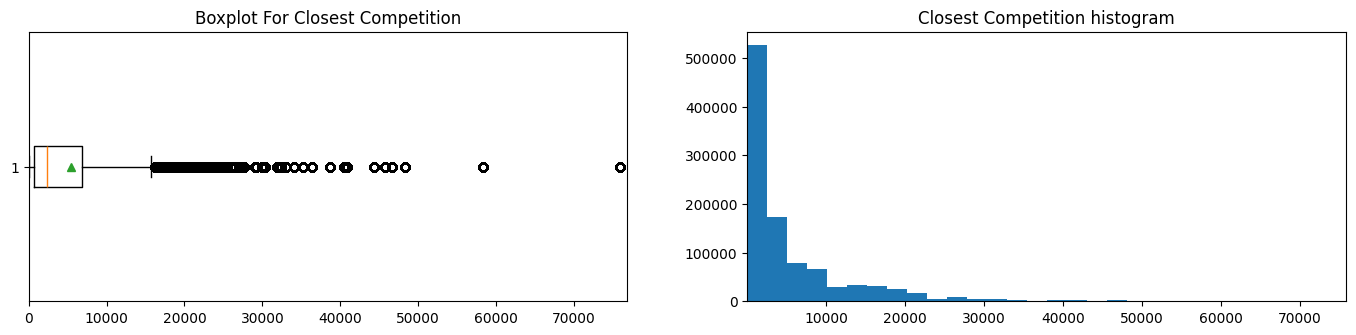

In [28]:
df_store_check_distribution=train_store.drop(train_store[pd.isnull(train_store.CompetitionDistance)].index)
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_store_check_distribution.CompetitionDistance, showmeans=True,vert=False,)
axes[0].set_xlim(0,max(df_store_check_distribution.CompetitionDistance+1000))
axes[0].set_title('Boxplot For Closest Competition')
axes[1].hist(df_store_check_distribution.CompetitionDistance, cumulative=False, bins=30)
axes[1].set_title("Closest Competition histogram")
axes[1].set_xlim((min(df_store_check_distribution.CompetitionDistance), max(df_store_check_distribution.CompetitionDistance)))
{"Mean":np.nanmean(train_store.CompetitionDistance),"Median":np.nanmedian(train_store.CompetitionDistance),"Standard Dev":np.nanstd(train_store.CompetitionDistance)}
#That's what i thought, very different values, let's see why 

Note:-We see a highly right skewed distribution for this variable with a significant difference between the mean and the median. This being caused by the amount of disperness in the data with a standard deviation of 7659, higher than the mean and the median.

What do we do then?

It is realistically better to input the median value to the Nan stores then the mean since the mean is biased by those outliers.

In [29]:
train_store['CompetitionDistance'].fillna(train_store['CompetitionDistance'].median(), inplace = True)

CompetitionOpenSinceMonth and CompetitionOpenSinceYear

Since we have no information whatsoever on those missing values and no accurate way of filling those values. So those fields are going to be assigned to 0 .

In [30]:
train_store.CompetitionOpenSinceMonth.fillna(0, inplace = True)
train_store.CompetitionOpenSinceYear.fillna(0,inplace=True)

##### Promo2SinceWeek, Promo2SinceYear and PromoInterval

This case is pretty straighforward, all the missing values comes from fields where Promo2=0 which means there are no continuous promotional activities for those stores. Having no promotion means those fields have to be 0 as well since they are linked to Promo2.

In [31]:
train_store.Promo2SinceWeek.fillna(0,inplace=True)
train_store.Promo2SinceYear.fillna(0,inplace=True)
train_store.PromoInterval.fillna(0,inplace=True)

StateHoliday

In [32]:
train_store.StateHoliday.fillna(0,inplace=True)

In [33]:
train_store.isnull().sum()

Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Year                         0
Month                        0
Day                          0
Dates                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Note:- There is no missing value in train store data.

In [34]:
train_store.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,Dates,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01,2014-04-11 01:30:42.846061824,5.422034e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,2013-01-01 00:00:00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,2013-08-17 00:00:00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,2014-04-02 00:00:00,2.330000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,2014-12-12 00:00:00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,2015-07-31 00:00:00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00,NaN,7.706913e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03


## Reading the description report 

### Sales

The __minimum sale__ is 0

The __maximum sale__ is 41551.00

25% of sale is below 3727.000

50% of sale is below 5744.000

75% of sale is below 7856.000

### Customers

The __minimum customer__ is 0

The __maximum customer__ is 7388

25% of customer is below 405

50% of customer is below 609

75% of customer is below 837

In [35]:
cleaned_df = train_store.copy()

Probability distribution function (PDF)

Sales Distribution

Text(0.5, 1.0, 'Sales Distribution')

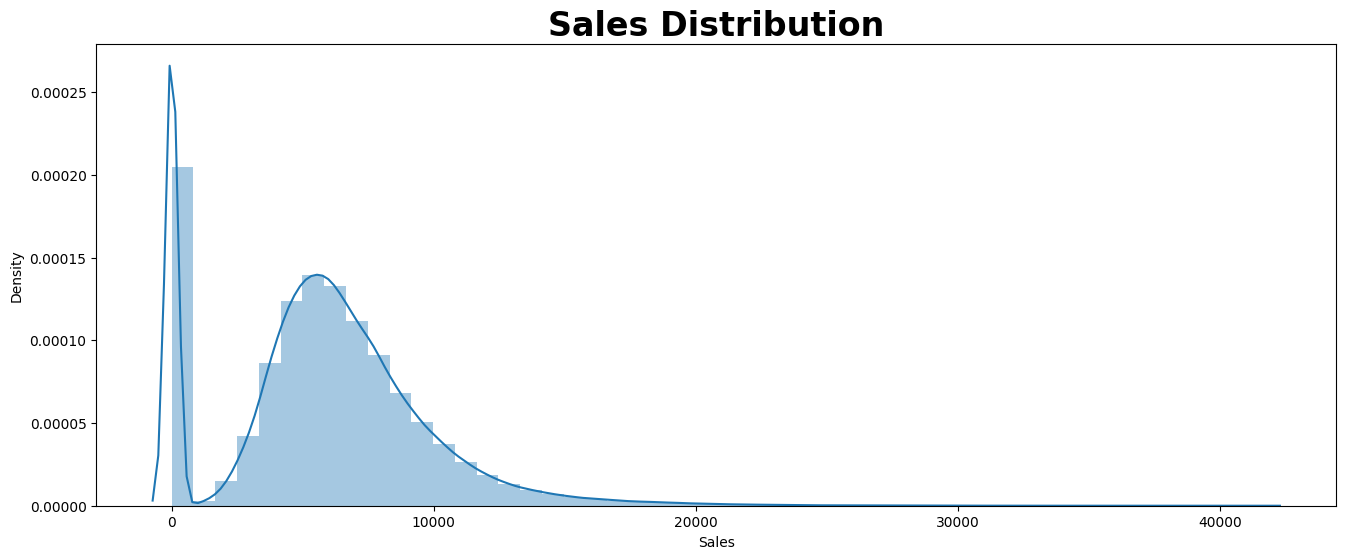

In [36]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
plt.figure(figsize=(16, 6))
sns.distplot(cleaned_df['Sales']).set_title('Sales Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

Customers Distribution

Text(0.5, 1.0, 'Customers Distribution')

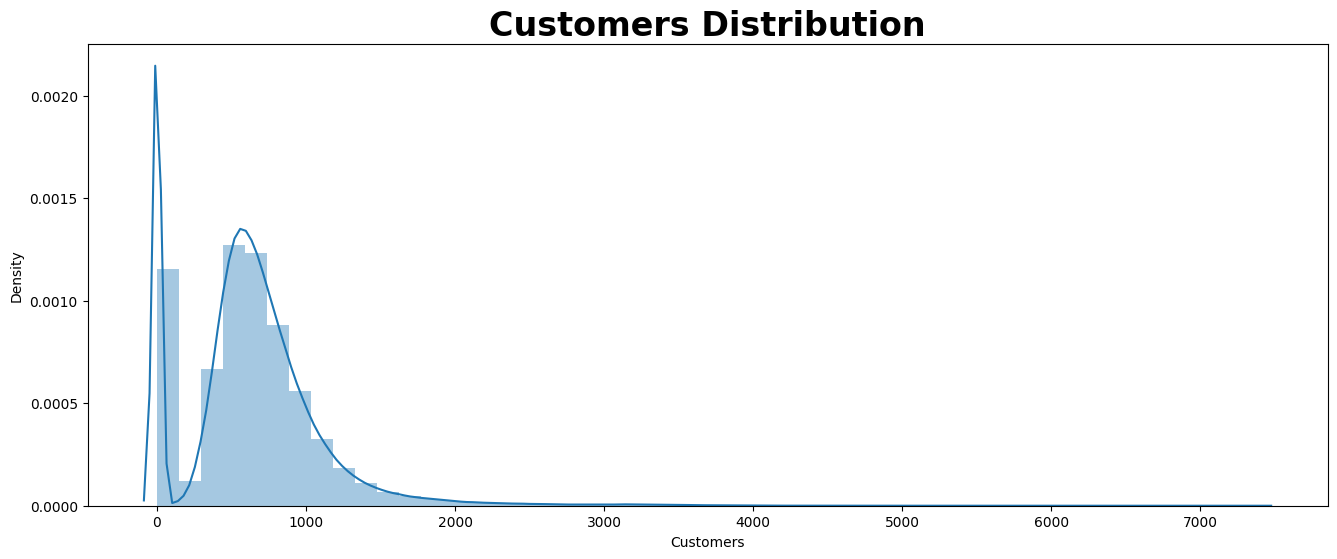

In [37]:
plt.figure(figsize=(16, 6))
sns.distplot(cleaned_df['Customers']).set_title('Customers Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

We can see that there are some outliers in sales and customers distribuiton

let's check it with boxplot

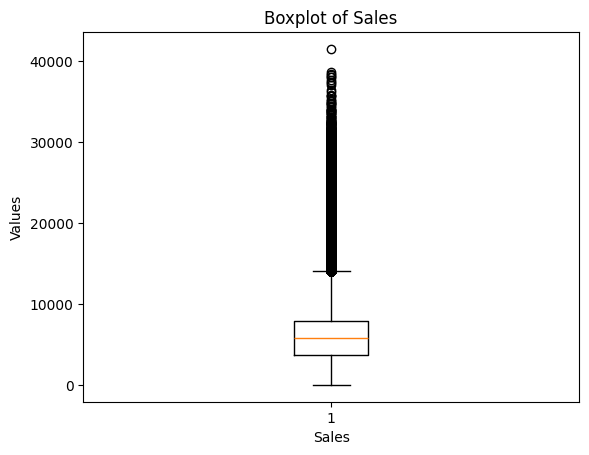

In [38]:
import matplotlib.pyplot as plt

# Assuming 'cleaned_df' is your DataFrame containing sales data and 'Sales' is the column to be plotted
plt.boxplot(cleaned_df['Sales'])

# Optionally, you can add labels to the plot
plt.xlabel('Sales')
plt.ylabel('Values')
plt.title('Boxplot of Sales')

plt.show()


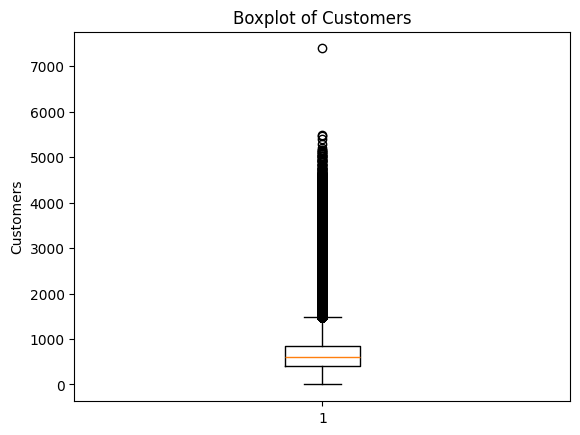

In [39]:
# Assuming 'cleaned_df' is a DataFrame with a column named 'Sales'
plt.boxplot(cleaned_df['Customers'])
plt.title('Boxplot of Customers')
plt.ylabel('Customers')
plt.show()

Boxenplot sales with dayofweek

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

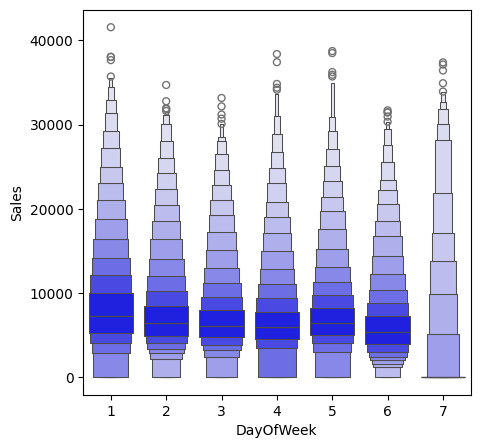

In [40]:
plt.figure(figsize=(5,5))
sns.boxenplot(data=cleaned_df,scale="linear",x="DayOfWeek",y="Sales",color="Blue")

Boxenplot customers with Dayofweek

<Axes: xlabel='DayOfWeek', ylabel='Customers'>

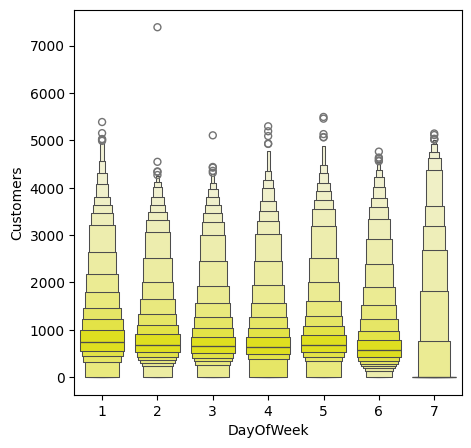

In [41]:
plt.figure(figsize=(5,5))
sns.boxenplot(y="Customers", x="DayOfWeek",data=cleaned_df, scale="linear",color="Yellow")

This data, contains many outliers, but these might have been caused to the surge of customers during a festival or Holiday, or due to an effective promo. Below we are handle the outliers

In [42]:
# we user our cleanTelecomData class to clean our data
# note: you can find the implmentation of CleanTelecomData inside scripts folder

# cleaner = MyCleaner(cleaned_df)

In [43]:
# cleaned_df = cleaner.replace_outlier_with_median('Sales')

In [44]:
#Treating the outliers 
  # a function for replacing outliers with the median, used when there's too many outliers in a feature
def replace_outlier_with_median(dataFrame, feature):
    Q1 = dataFrame[feature].quantile(0.25)
    Q3 = dataFrame[feature].quantile(0.75)
    median = dataFrame[feature].quantile(0.50)

    IQR = Q3 - Q1

    upper_whisker = Q3 + (1.5 * IQR)
    lower_whisker = Q1 - (1.5 * IQR)

    dataFrame[feature] = np.where(dataFrame[feature] > upper_whisker, median, dataFrame[feature])
    dataFrame[feature] = np.where(dataFrame[feature] < lower_whisker, median, dataFrame[feature])

In [45]:
replace_outlier_with_median(cleaned_df, 'Sales')

In [46]:
replace_outlier_with_median(cleaned_df, 'Customers')

#### Visual Inspection

DayOfWeek, Open vs closed distribution

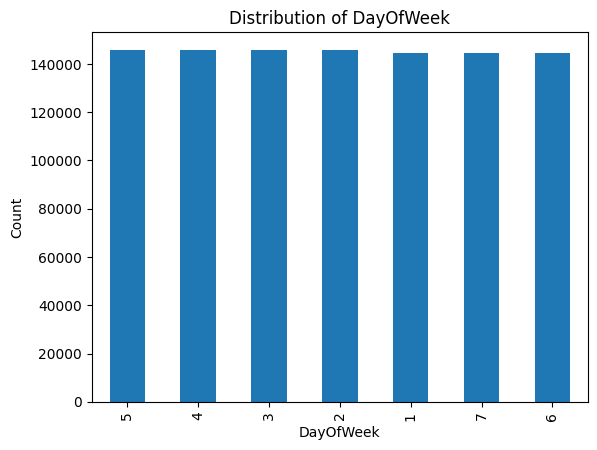

In [47]:
# Plotting distribution using Matplotlib
cleaned_df['DayOfWeek'].value_counts().plot(kind='bar')
plt.title('Distribution of DayOfWeek')
plt.xlabel('DayOfWeek')
plt.ylabel('Count')
plt.show()

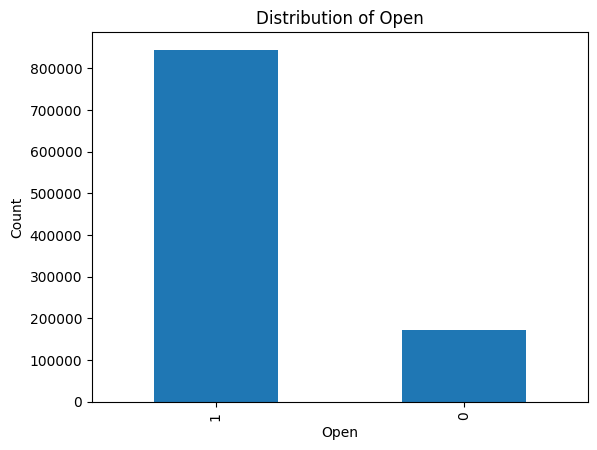

In [48]:
class Plots:
    @staticmethod
    def plot_count(df, column):
        df[column].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

# Now you can use it like this:
plots = Plots()
plots.plot_count(cleaned_df, 'Open')

State Holiday School Holidays & Promo

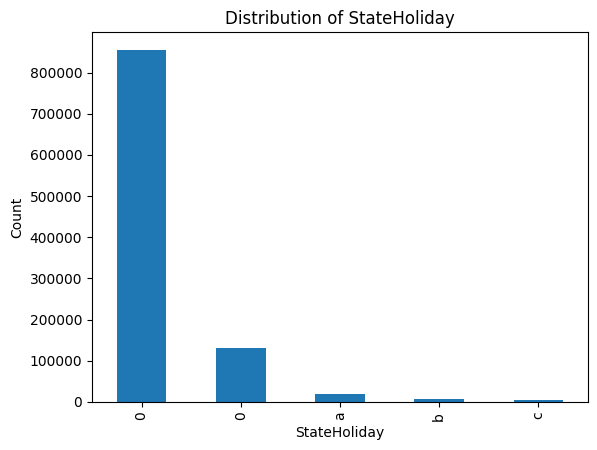

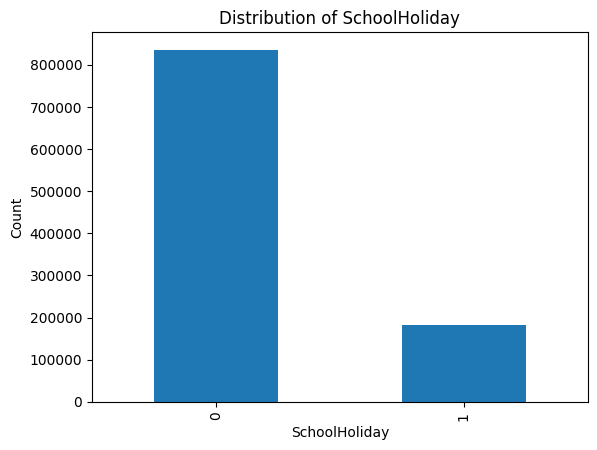

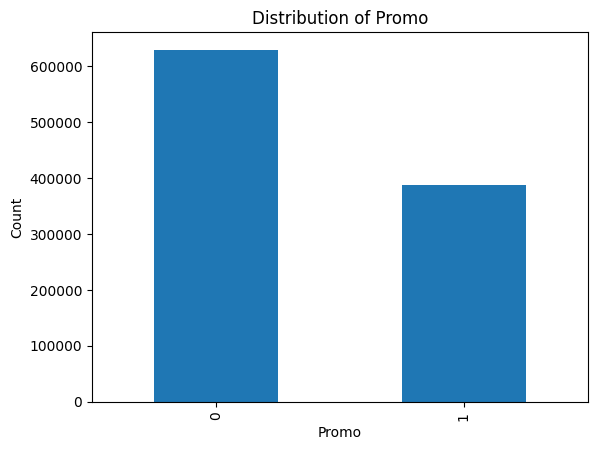

In [49]:
plots.plot_count(cleaned_df, 'StateHoliday')
plots.plot_count(cleaned_df, 'SchoolHoliday')
plots.plot_count(cleaned_df, 'Promo')

Year, Month & WeekOfYear distribution

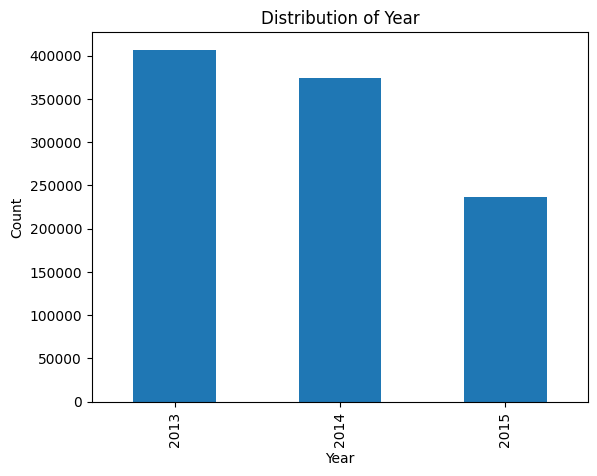

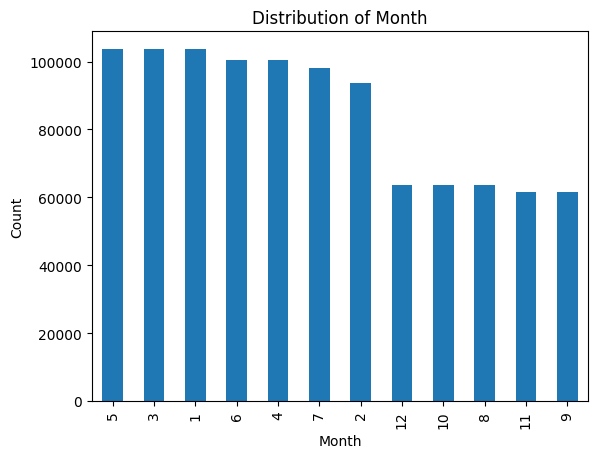

In [50]:
plots.plot_count(cleaned_df, 'Year')
plots.plot_count(cleaned_df, 'Month')

StoreType, Assortment and Promo2 distribution

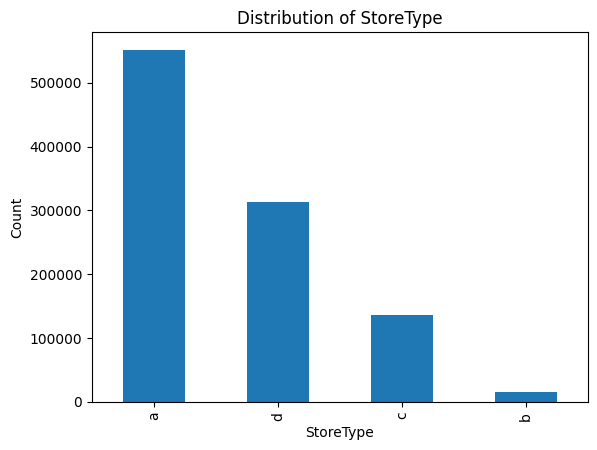

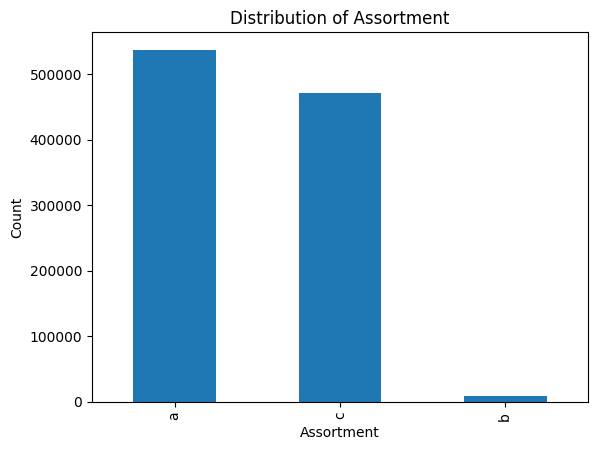

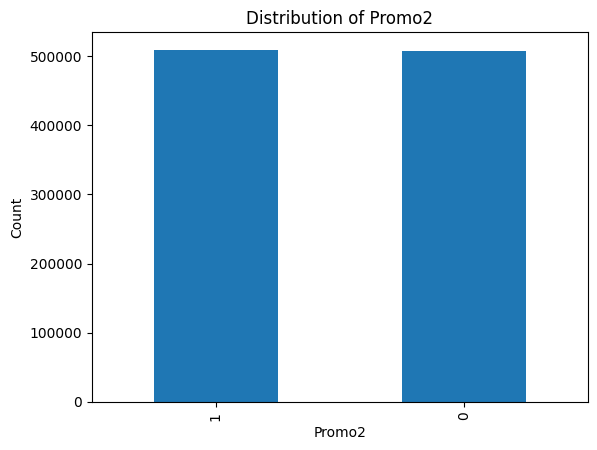

In [51]:
plots.plot_count(cleaned_df, 'StoreType')
plots.plot_count(cleaned_df, 'Assortment')
plots.plot_count(cleaned_df, 'Promo2')

Store frequency

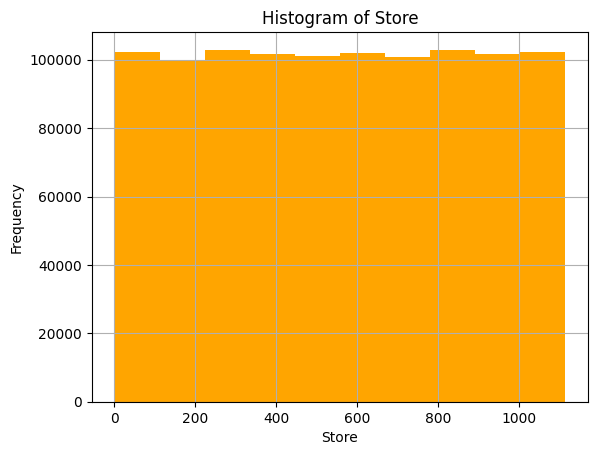

In [52]:
class Plots:

    @staticmethod
    def plot_hist(df, column, color='blue'):
        df[column].hist(color=color)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

# Now you can use it like this:
plots = Plots()
plots.plot_hist(cleaned_df, 'Store', 'orange')

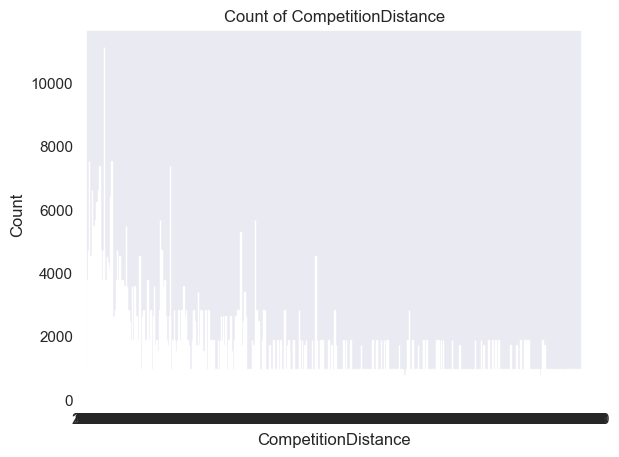

In [53]:
class Plots:
    @staticmethod
    def plot_count(df, column):
        sns.set(style="dark")
        sns.countplot(x=column, data=df)
        plt.title(f'Count of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

# Now you can use it like this:
plots = Plots()
plots.plot_count(cleaned_df, 'CompetitionDistance')

Text(0.5, 1.0, 'Customers Distribution')

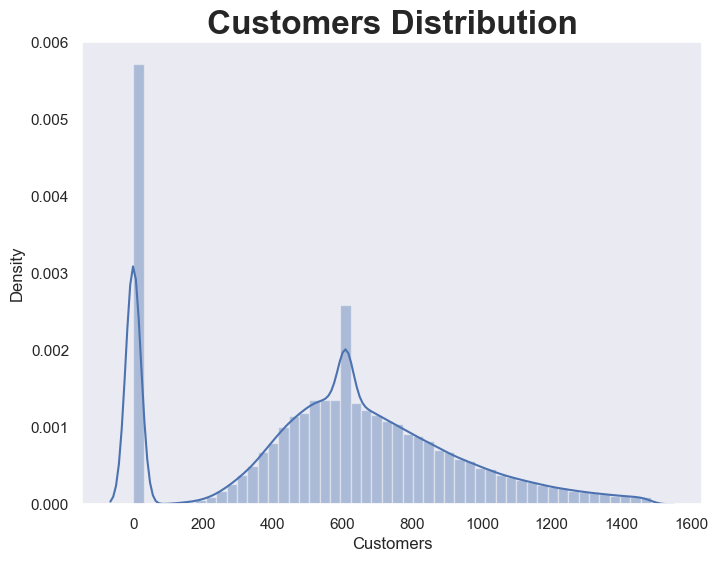

In [54]:
plt.figure(figsize=(8, 6))
sns.distplot(cleaned_df['Customers']).set_title('Customers Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

Text(0.5, 1.0, 'Sales Distribution')

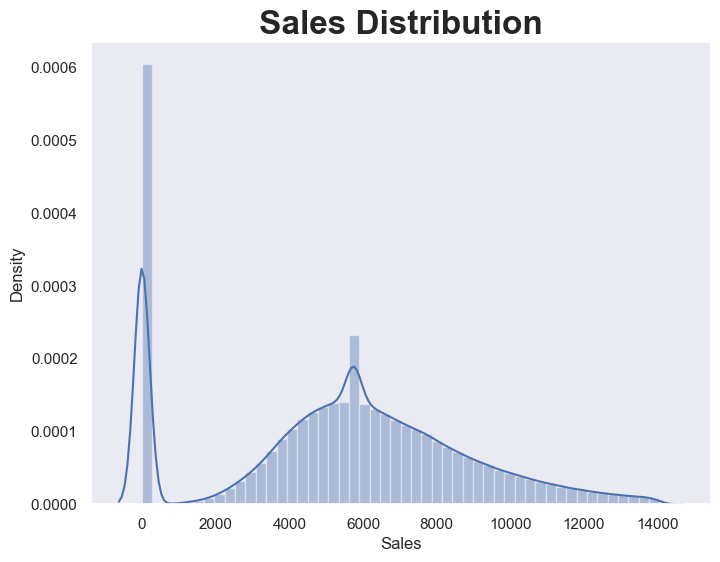

In [55]:
plt.figure(figsize=(8, 6))
sns.distplot(cleaned_df['Sales']).set_title('Sales Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

Feature Engeneering

Generating new features from already existing features.

In [56]:
#Adding salespercustomer column
cleaned_df['SalesperCustomer']=cleaned_df['Sales']/cleaned_df['Customers']

In [57]:
cleaned_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer
0,1,5,5263.0,555.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883
1,1,4,5020.0,546.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.194139
2,1,3,4782.0,523.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.143403
3,1,2,5011.0,560.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,8.948214
4,1,1,6102.0,612.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.970588


correlation Analysis

In [58]:
df_correlation=cleaned_df[['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo',
        'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'SalesperCustomer', 'Month', 'Year']]


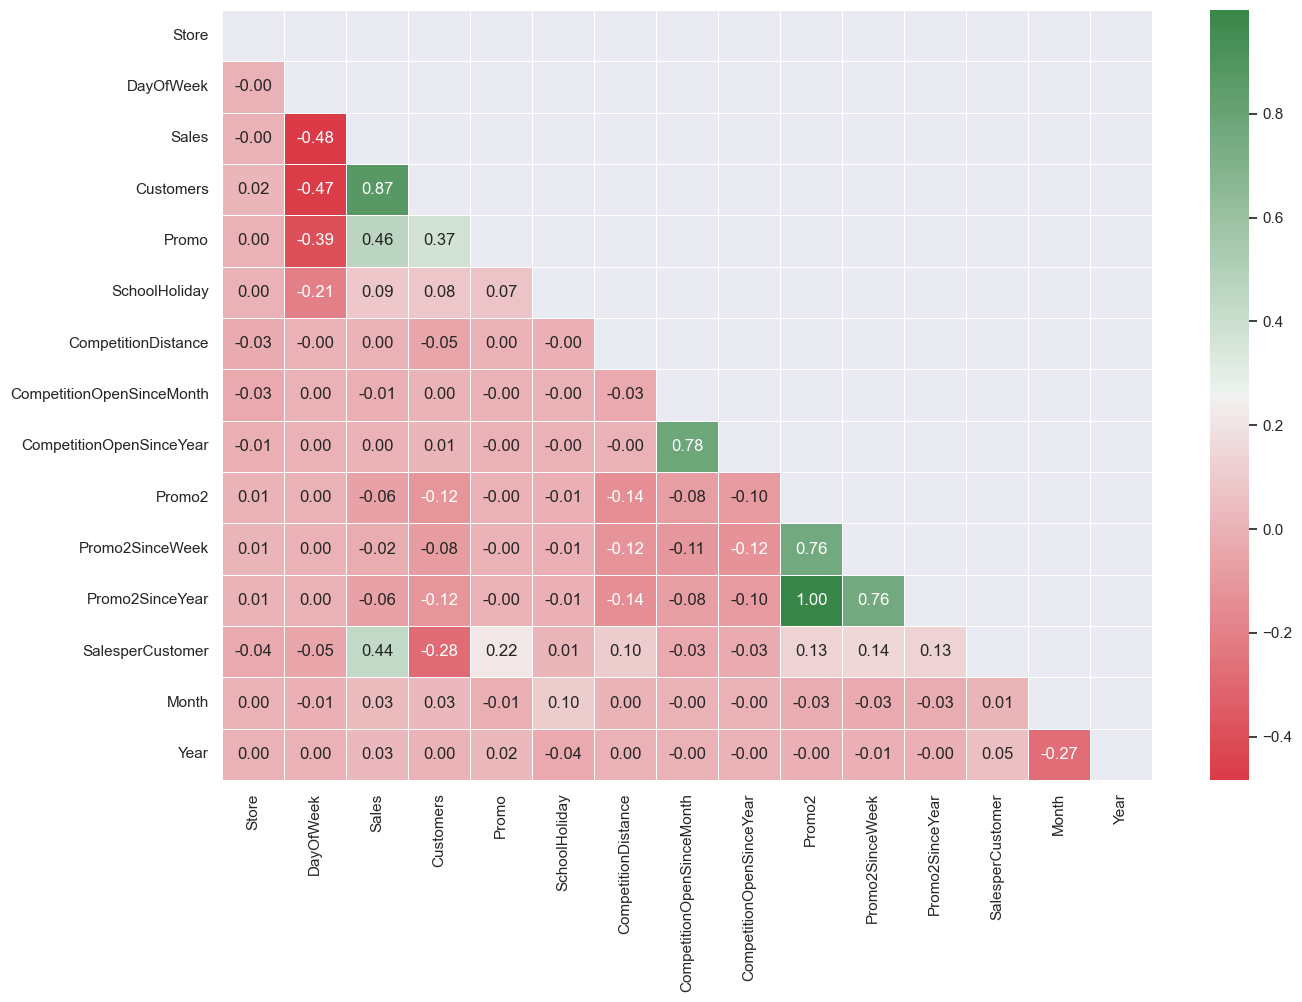

In [59]:
# Convert non-numeric values to NaN
df_numeric = df_correlation.apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Create a boolean mask for the upper triangle
upper_triangle = np.triu(np.ones_like(correlation_matrix, dtype=bool))
upper_triangle[np.triu_indices_from(upper_triangle)] = True

# Plotting the correlation matrix
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_numeric.corr(), ax=ax, mask=upper_triangle, annot=True, fmt='.2f', linewidths=0.5, cmap=sns.diverging_palette(10, 133, as_cmap=True))
plt.show()

-Since the competition variables CompetitionOpenSinceYear and CompeitionOpenSinceMonth have the same underlying meaning, merging them into one variable that we call CompetitionOpenSince makes easier for the algorithm to understand the pattern and creates less branches and thus complex trees.

In [60]:
cleaned_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer
0,1,5,5263.0,555.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883
1,1,4,5020.0,546.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.194139
2,1,3,4782.0,523.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.143403
3,1,2,5011.0,560.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,8.948214
4,1,1,6102.0,612.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.970588


In [61]:
cleaned_df['CompetitionOpenSince'] = np.where((cleaned_df['CompetitionOpenSinceMonth']==0) & 
                                                  (cleaned_df['CompetitionOpenSinceYear']==0) , 0,
                                                  (cleaned_df.Month - cleaned_df.CompetitionOpenSinceMonth) 
                                                  + (12 * (cleaned_df.Year - cleaned_df.CompetitionOpenSinceYear)) )

In [62]:
del cleaned_df['CompetitionOpenSinceYear']
del cleaned_df['CompetitionOpenSinceMonth']

In [63]:
cleaned_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer,CompetitionOpenSince
0,1,5,5263.0,555.0,1,1,0,1,2015,7,...,2015-07-31,c,a,1270.0,0,0.0,0.0,0,9.482883,82.0
1,1,4,5020.0,546.0,1,1,0,1,2015,7,...,2015-07-30,c,a,1270.0,0,0.0,0.0,0,9.194139,82.0
2,1,3,4782.0,523.0,1,1,0,1,2015,7,...,2015-07-29,c,a,1270.0,0,0.0,0.0,0,9.143403,82.0
3,1,2,5011.0,560.0,1,1,0,1,2015,7,...,2015-07-28,c,a,1270.0,0,0.0,0.0,0,8.948214,82.0
4,1,1,6102.0,612.0,1,1,0,1,2015,7,...,2015-07-27,c,a,1270.0,0,0.0,0.0,0,9.970588,82.0


In [64]:
cleaned_df.to_csv('C:\\Users\\Dell\\Desktop\\Next Hikes Project_6\\Finel_Clean_data.csv')

Data Scaling and Data Encoding

In [65]:
def get_data(data_source):
    # Your code to retrieve data from the specified source
    # Example: reading from a CSV file
    return pd.read_csv(data_source)

# Now you can use it like this:
train_df = get_data('C:\\Users\\Dell\\Desktop\\Next Hikes Project_6\\Finel_Clean_data.csv')  # Assuming 'Finel_Clean_data.csv' is the file path

In [66]:
class CleanTrainTestData:
    """
        this is a dataframe used to clean a dataframe
    """
    
    def __init__(self):
        pass
    
    def drop_closed_stores(self, df):
        
        try:
            cleaned = df.query("Open == 1")
            return cleaned
        except:
            pass
        
    def convert_to_datatime(self, df):  
        try:
            df['Date'] = pd.to_datetime(train_df['Date'])
            return df
        except:
            pass
    
    def sort_by_date(self, df):
        return df.sort_values(by=["Date"], ascending=False)
    
    def to_str(self, df):
        df['StateHoliday'] = df['StateHoliday'].astype(str)
        return df
    
    
    """Extracts Day Month and Year from Date"""
    def transform_date(self, df):
        
        df['Date'] = pd.to_datetime(df['Date'])
        df['Year'] = pd.DatetimeIndex(df['Date']).year
        df['Month'] = pd.DatetimeIndex(df['Date']).month
        df['Day'] = pd.DatetimeIndex(df['Date']).day
        return df

In [67]:
cleaner = CleanTrainTestData()
cleaned_train_df = cleaner.transform_date(df_train)
cleaned_train_df = cleaner.sort_by_date(cleaned_train_df)
cleaned_train_df = cleaner.to_str(cleaned_train_df)


display(cleaned_train_df)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31
742,743,5,2015-07-31,5085,501,1,1,0,1,2015,7,31
748,749,5,2015-07-31,6612,716,1,1,0,1,2015,7,31
747,748,5,2015-07-31,7481,578,1,1,0,1,2015,7,31
746,747,5,2015-07-31,10708,826,1,1,0,1,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1016471,377,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1016472,378,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1016473,379,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1016474,380,2,2013-01-01,0,0,0,0,a,1,2013,1,1


#### Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

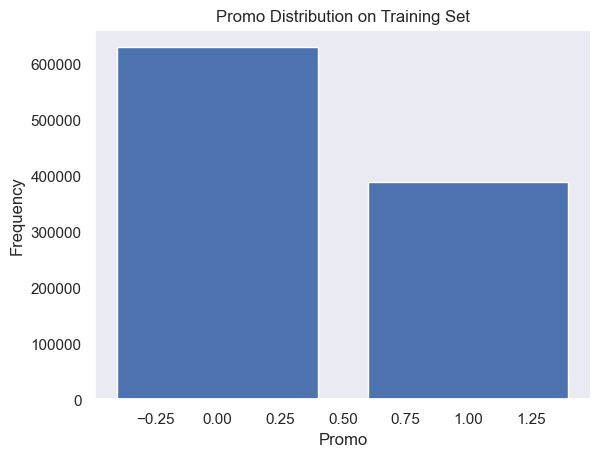

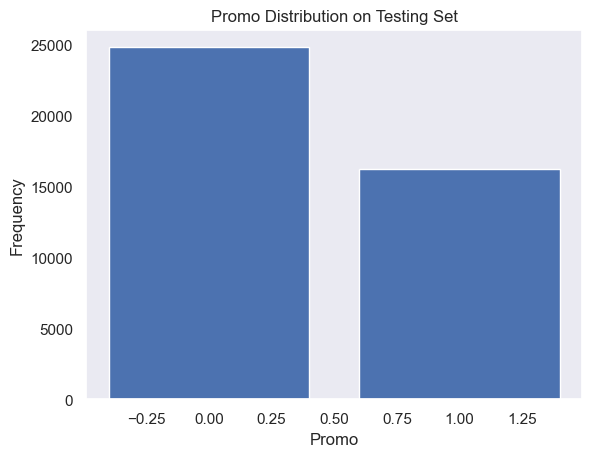

In [68]:
# Assuming df_train and test_df are already defined

train_distribution = df_train['Promo'].value_counts()
test_distribution = test_df['Promo'].value_counts()

# Plotting the distributions
plt.bar(train_distribution.index, train_distribution)
plt.title("Promo Distribution on Training Set")
plt.xlabel("Promo")
plt.ylabel("Frequency")
plt.show()

plt.bar(test_distribution.index, test_distribution)
plt.title("Promo Distribution on Testing Set")
plt.xlabel("Promo")
plt.ylabel("Frequency")
plt.show()

#### Check & compare sales behavior before, during and after holidays

### Find out any seasonal (Christmas, Easter etc) purchase behaviours

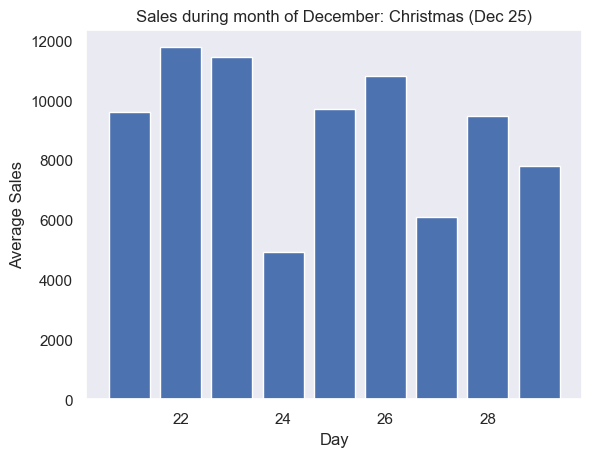

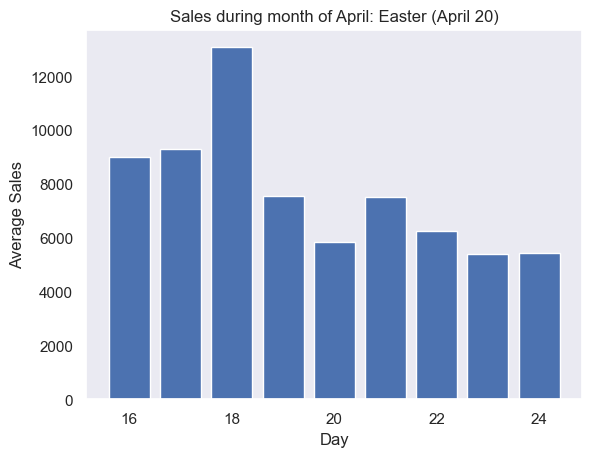

In [69]:
open_store = train_store[(train_store.Open == 1) & (train_store.Year == 2014)]

christmass_month = 12
eastern_month = 4

christmass_month = open_store[open_store.Month == christmass_month]
eastern_month = open_store[open_store.Month == eastern_month]

# plot.bar(chris['Day'], chris['Sales'], 'Sales during month of December: Christmas (Dec 25)')
# plot.bar(eastern['Day'], eastern['Sales'], 'Sales during month of April: Eastern (April 20)')

around_christmas = christmass_month[(christmass_month['Day'] > 20) & (christmass_month['Day'] < 30)]
around_christmas = around_christmas[['Day', 'Sales']].groupby('Day').mean()


around_eastern = eastern_month[(eastern_month['Day'] > 15) & (eastern_month['Day'] < 25)]
around_eastern = around_eastern[['Day', 'Sales']].groupby('Day').mean()

# Assuming you have already calculated around_christmas and around_eastern

# Plotting sales around Christmas
plt.bar(around_christmas.index, around_christmas['Sales'])
plt.title('Sales during month of December: Christmas (Dec 25)')
plt.xlabel('Day')
plt.ylabel('Average Sales')
plt.show()

# Plotting sales around Easter
plt.bar(around_eastern.index, around_eastern['Sales'])
plt.title('Sales during month of April: Easter (April 20)')
plt.xlabel('Day')
plt.ylabel('Average Sales')
plt.show()

#### What can you say about the correlation between sales and number of customers?


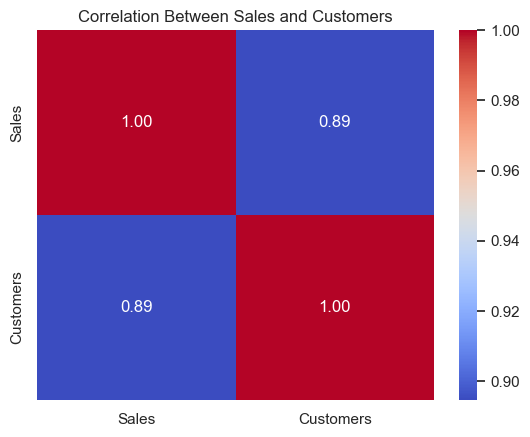

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_store dataframe is already defined

# Calculate correlation matrix
correlation_matrix = train_store[['Sales', 'Customers']].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Sales and Customers')
plt.show()


Note:-Insight :-> There is a high correlation b/n Sales and Customers. The more customers the more sales

#### How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

<Figure size 1200x700 with 0 Axes>

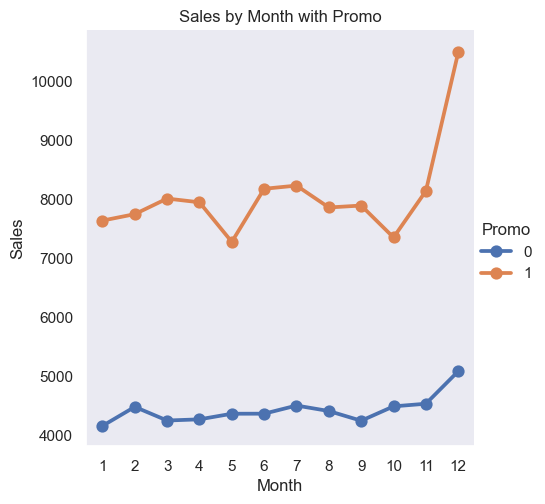

In [71]:
plt.figure(figsize=(12,7))
sns.catplot(data=train_store, x="Month", y="Sales", hue='Promo', kind='point', sharex=False)
plt.title('Sales by Month with Promo')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


Note:-Insight :-> Having a promotion increase the Sales and also the customers

#### Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

Number of Stores with less than 5143.545555555555 mean sales are 112


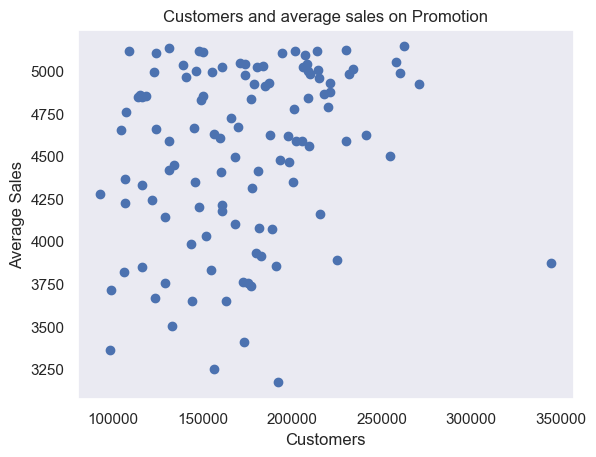

In [72]:
'''
Promo should be deployed on stores which have __ sales and __ customers (more, **less)?
'''

store_with_promo = train_store[train_store.Promo == 1]
result = store_with_promo[['Store','Sales', 'Customers']].groupby('Store').agg({"Sales":"mean", 'Customers':'sum'})

low_sales = result['Sales'].quantile(0.1) # least 10 percent sales
# Filter stores with sales less than or equal to low_sales
small_sales = result[result['Sales'] <= low_sales]

# Print the number of stores with less than low_sales mean sales
print(f"Number of Stores with less than {low_sales} mean sales are {small_sales.shape[0]}")

# Plot scatter plot
plt.scatter(small_sales['Customers'], small_sales['Sales'])
plt.title('Customers and average sales on Promotion')
plt.xlabel('Customers')
plt.ylabel('Average Sales')
plt.show()

In [73]:
promos_store = train_store[['Store','StoreType','Promo','Sales','Customers']]

In [74]:
promos_store = promos_store.groupby(['StoreType',"Promo"]).\
                agg({'Store':"count","Sales":"sum","Customers":"sum"})
promos_store

Store       Sales  Customers
StoreType Promo                               
a         0      341123  1466971549  180276608
          1      210504  1698363310  183264826
b         0        9784    92061910   18685985
          1        6046    67169485   12779636
c         0       84596   375186657   47222206
          1       52244   408034769   44907499
d         0      193626   837754221   79593008
          1      119286   927638722   77311987

Note:-Note: as we can see from above table if we deploy promo in StoreType a we can both attract more customer and there is a huge increase in Sales relative to the other stores

#### Trends of customer behavior during store open and closing times


In [75]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31


In [76]:
df_train[df_train['Open'] == 1]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,2013,1,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,2013,1,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,2013,1,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,2013,1,1


In [77]:
data_open_state = df_train[['Open','Customers']]
data_open_state = data_open_state.groupby(['Open']).agg({"Customers":'sum'})
data_open_state

,Customers
Open,
0,0
1,644041755


<Axes: xlabel='Open', ylabel='Customers'>

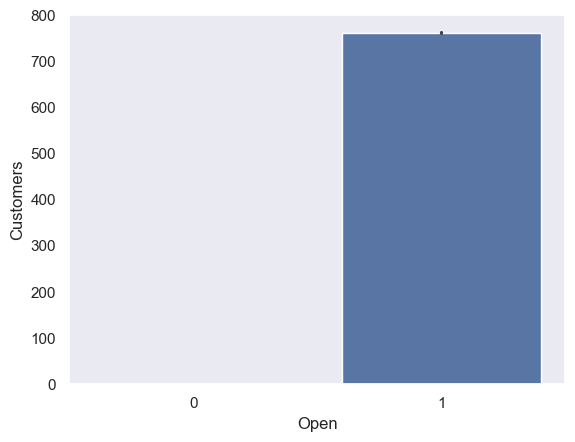

In [78]:
sns.barplot(x="Open",y='Customers', data=df_train)

Note:-Note: from this the trends as expected when the Pharmaceutical is closed there is no customer, All the customer interacts with the pharmaceutical when it is opened

<Figure size 1200x700 with 0 Axes>

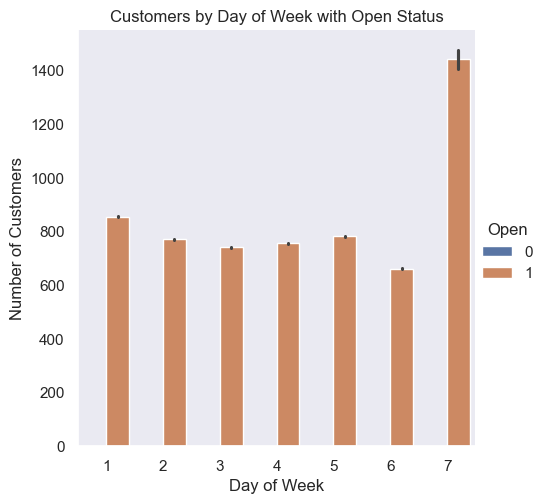

In [79]:
plt.figure(figsize=(12, 7))
sns.catplot(data=train_store, x="DayOfWeek", y="Customers", hue='Open', kind='bar', sharex=False)
plt.title('Customers by Day of Week with Open Status')
plt.xlabel('Day of Week')
plt.ylabel('Number of Customers')
plt.show()

Note:-Note: from this the trends as expected when the Pharmaceutical 0 is closed there is no customer, All the customer interacts with the pharmaceutical when it 1 is opened.

#### Which stores are opened on all weekdays? How does that affect their sales on weekends?

In [80]:
train_store.head(3)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,2015-07-31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,5020,546,1,1,0,1,2015,7,...,2015-07-30,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,4782,523,1,1,0,1,2015,7,...,2015-07-29,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [81]:
import logging
import logging.handlers

In [82]:
def store_days_open(dataset, storeType=['a','b','c']):
    for store in storeType:
        try:

            days = dataset[dataset.Open == True][dataset.StoreType == store].DayOfWeek.unique()
            print(f" For StoreType: {store}, the Days of the week that is OPen are: {days}")
            logging.info(f"Getting days of the week where by the store are open, successfully")
            
        except Exception as e:
            logging.debug(f"Exception occured in getting days in which stores are open, {e}")

In [83]:
storeTypes_list = ['a','b', 'c','d']
store_days_open(train_store, storeTypes_list)

 For StoreType: a, the Days of the week that is OPen are: [5 4 3 2 1 6 7]
 For StoreType: b, the Days of the week that is OPen are: [5 4 3 2 1 7 6]
 For StoreType: c, the Days of the week that is OPen are: [5 4 3 2 1 6]
 For StoreType: d, the Days of the week that is OPen are: [5 4 3 2 1 6 7]


Note:-Store Type 'a, b, and d' are open throught the week (weekdays and weekends), while Store Type 'd' is closed in Sunday

#### Store Type Sales with respect to Days of the week

In [84]:
weekday_data = train_store[['Open', "DayOfWeek","StoreType",'Sales']]

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

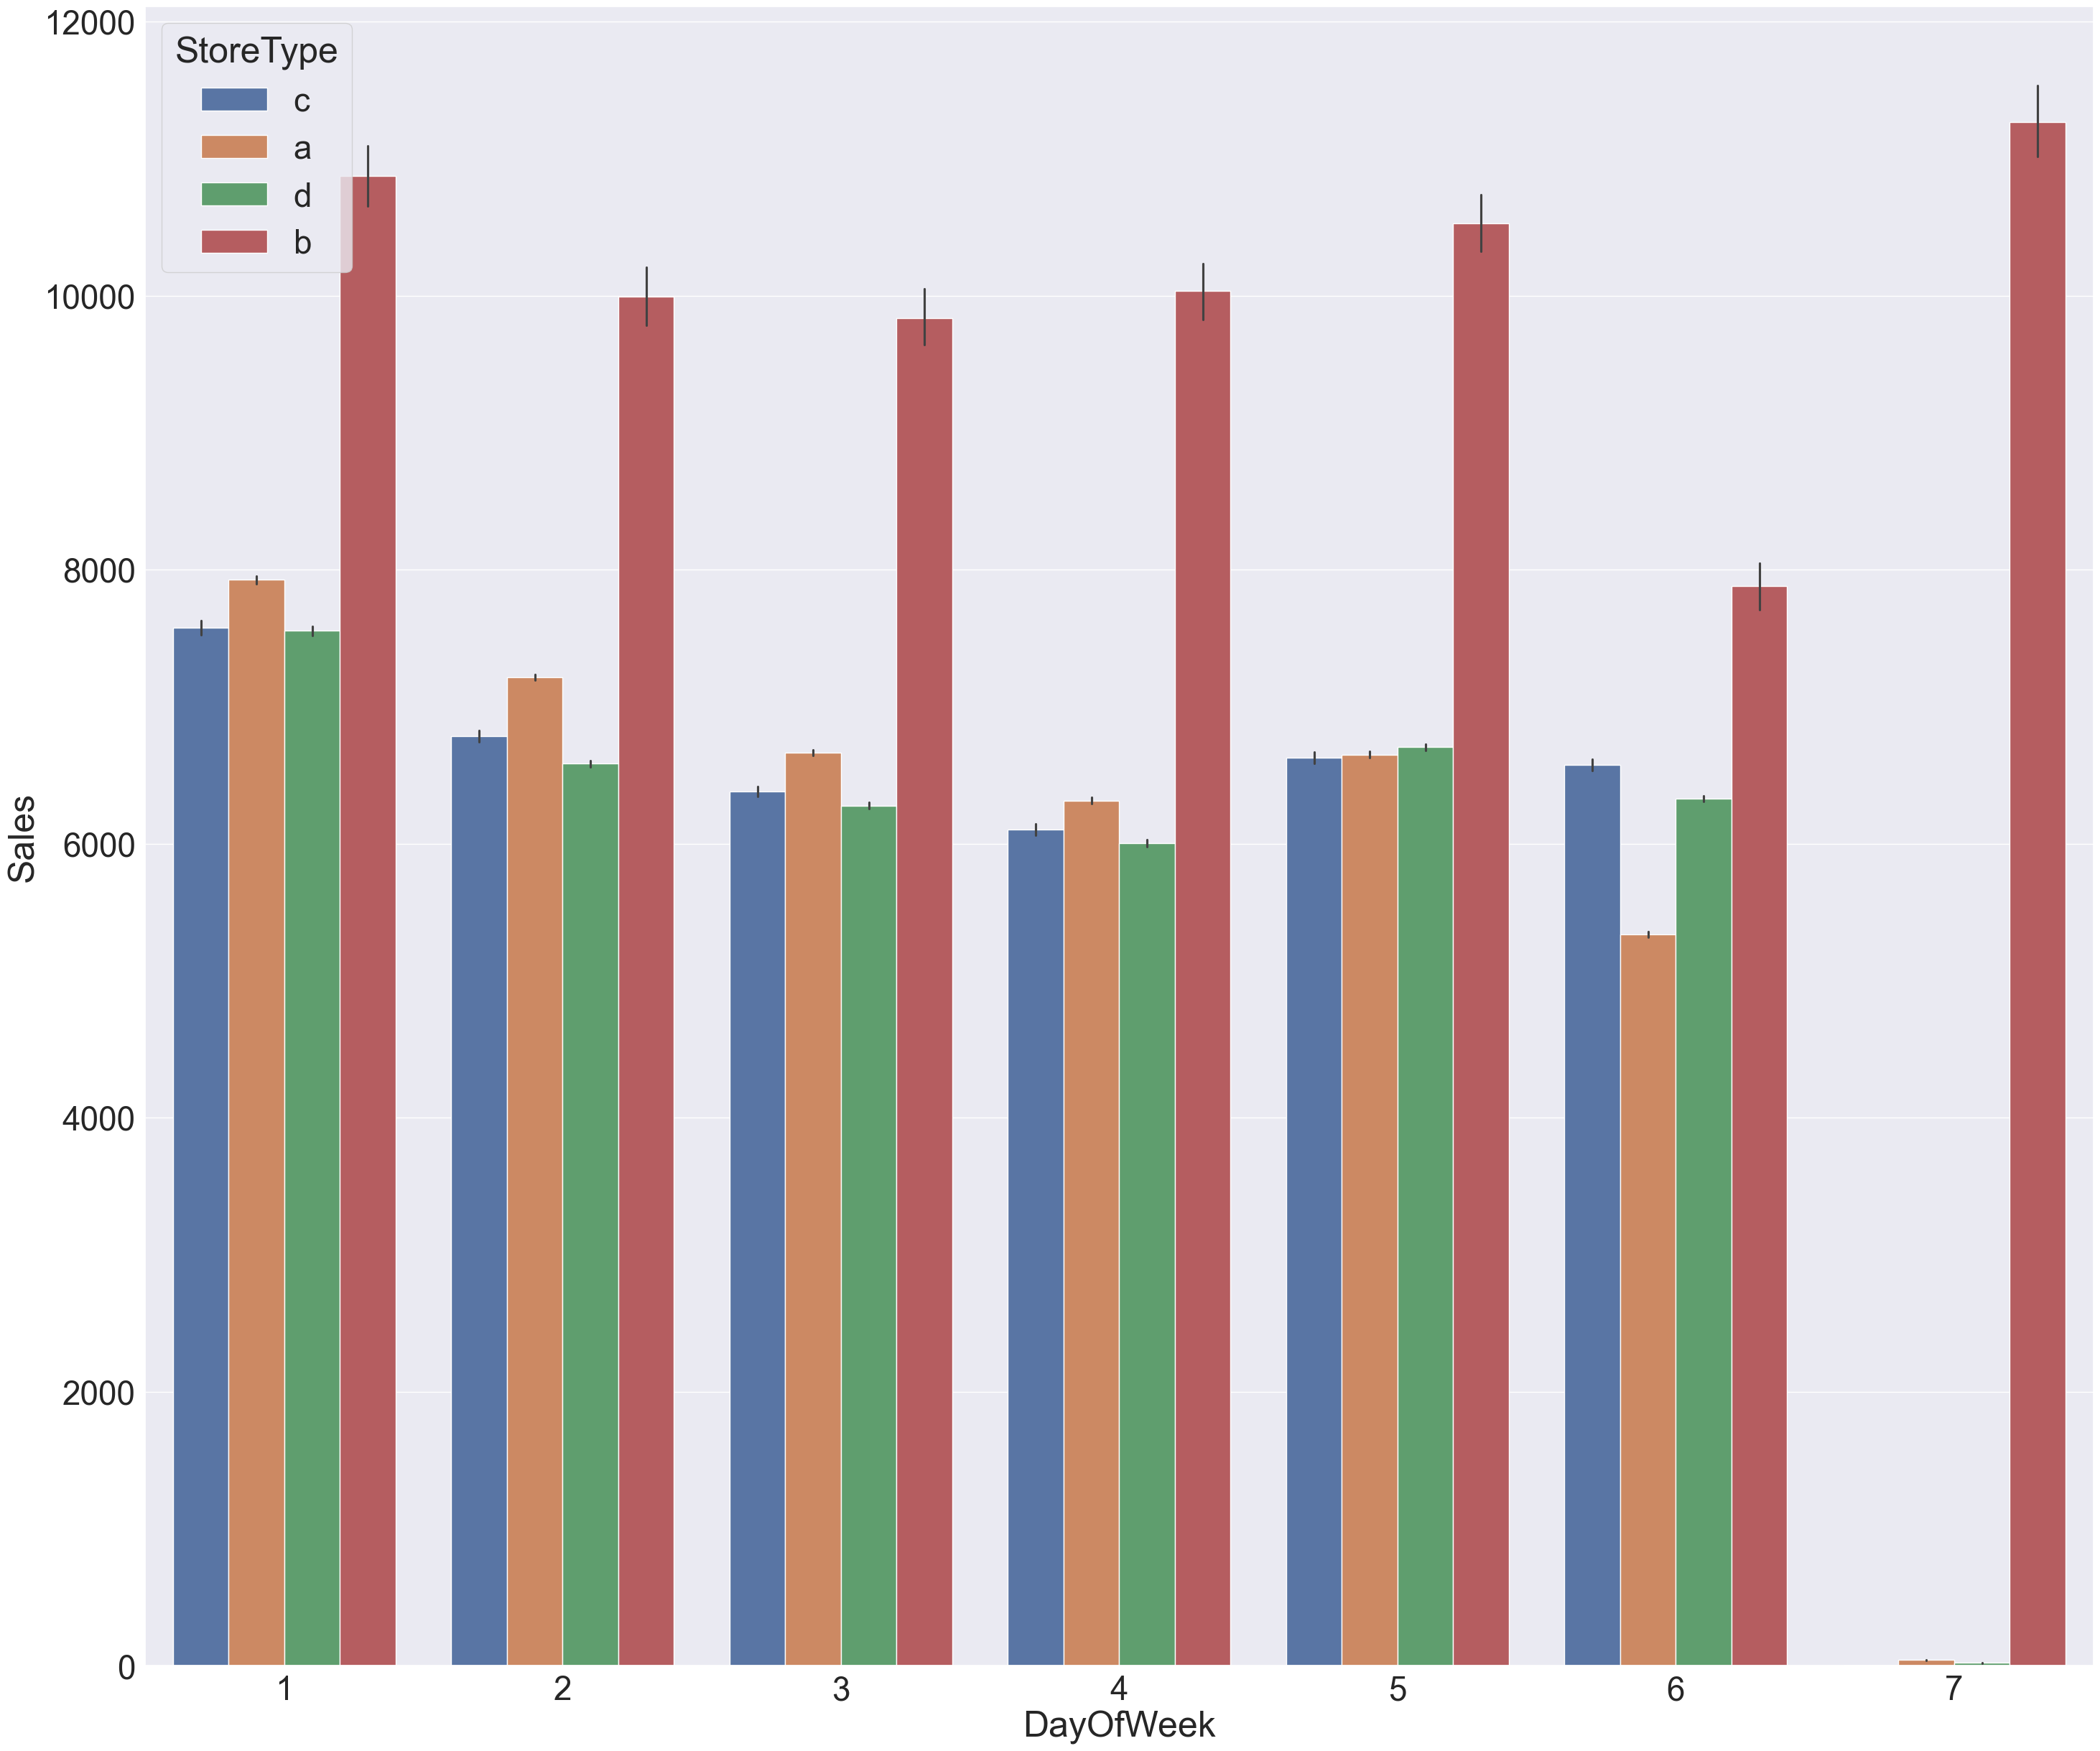

In [85]:
sns.set(font_scale=3)  
plt.figure(figsize=(35,30))
sns.barplot(x="DayOfWeek", y="Sales", hue="StoreType", data=weekday_data)

Note:- from above figure we can see that all Store Types are working all weekdays except Store Type c. and the effect as seen on the 7th day from the figure above the Store Type c is kind have kind of low overall sales as shown in the figure below

Store Types 'a' is Open on all days of the week, and has least sales on Saturday, and almost no sales on sunday,

Store Type 'c' is open on all days of the week, and has almost no sales on sunday,

Store Type 'd' is open from Monday to Saturday, with sales almost constant and on Sunday is closed, and

Store Type 'b' is open on all days of the week, and has almost constant sales during weekdays and less sales on saturday, and highest sales on Sunday.

In [86]:
weekday_data1 = train_store.groupby(['StoreType']).agg({"DayOfWeek":"count","Sales":'sum'})

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

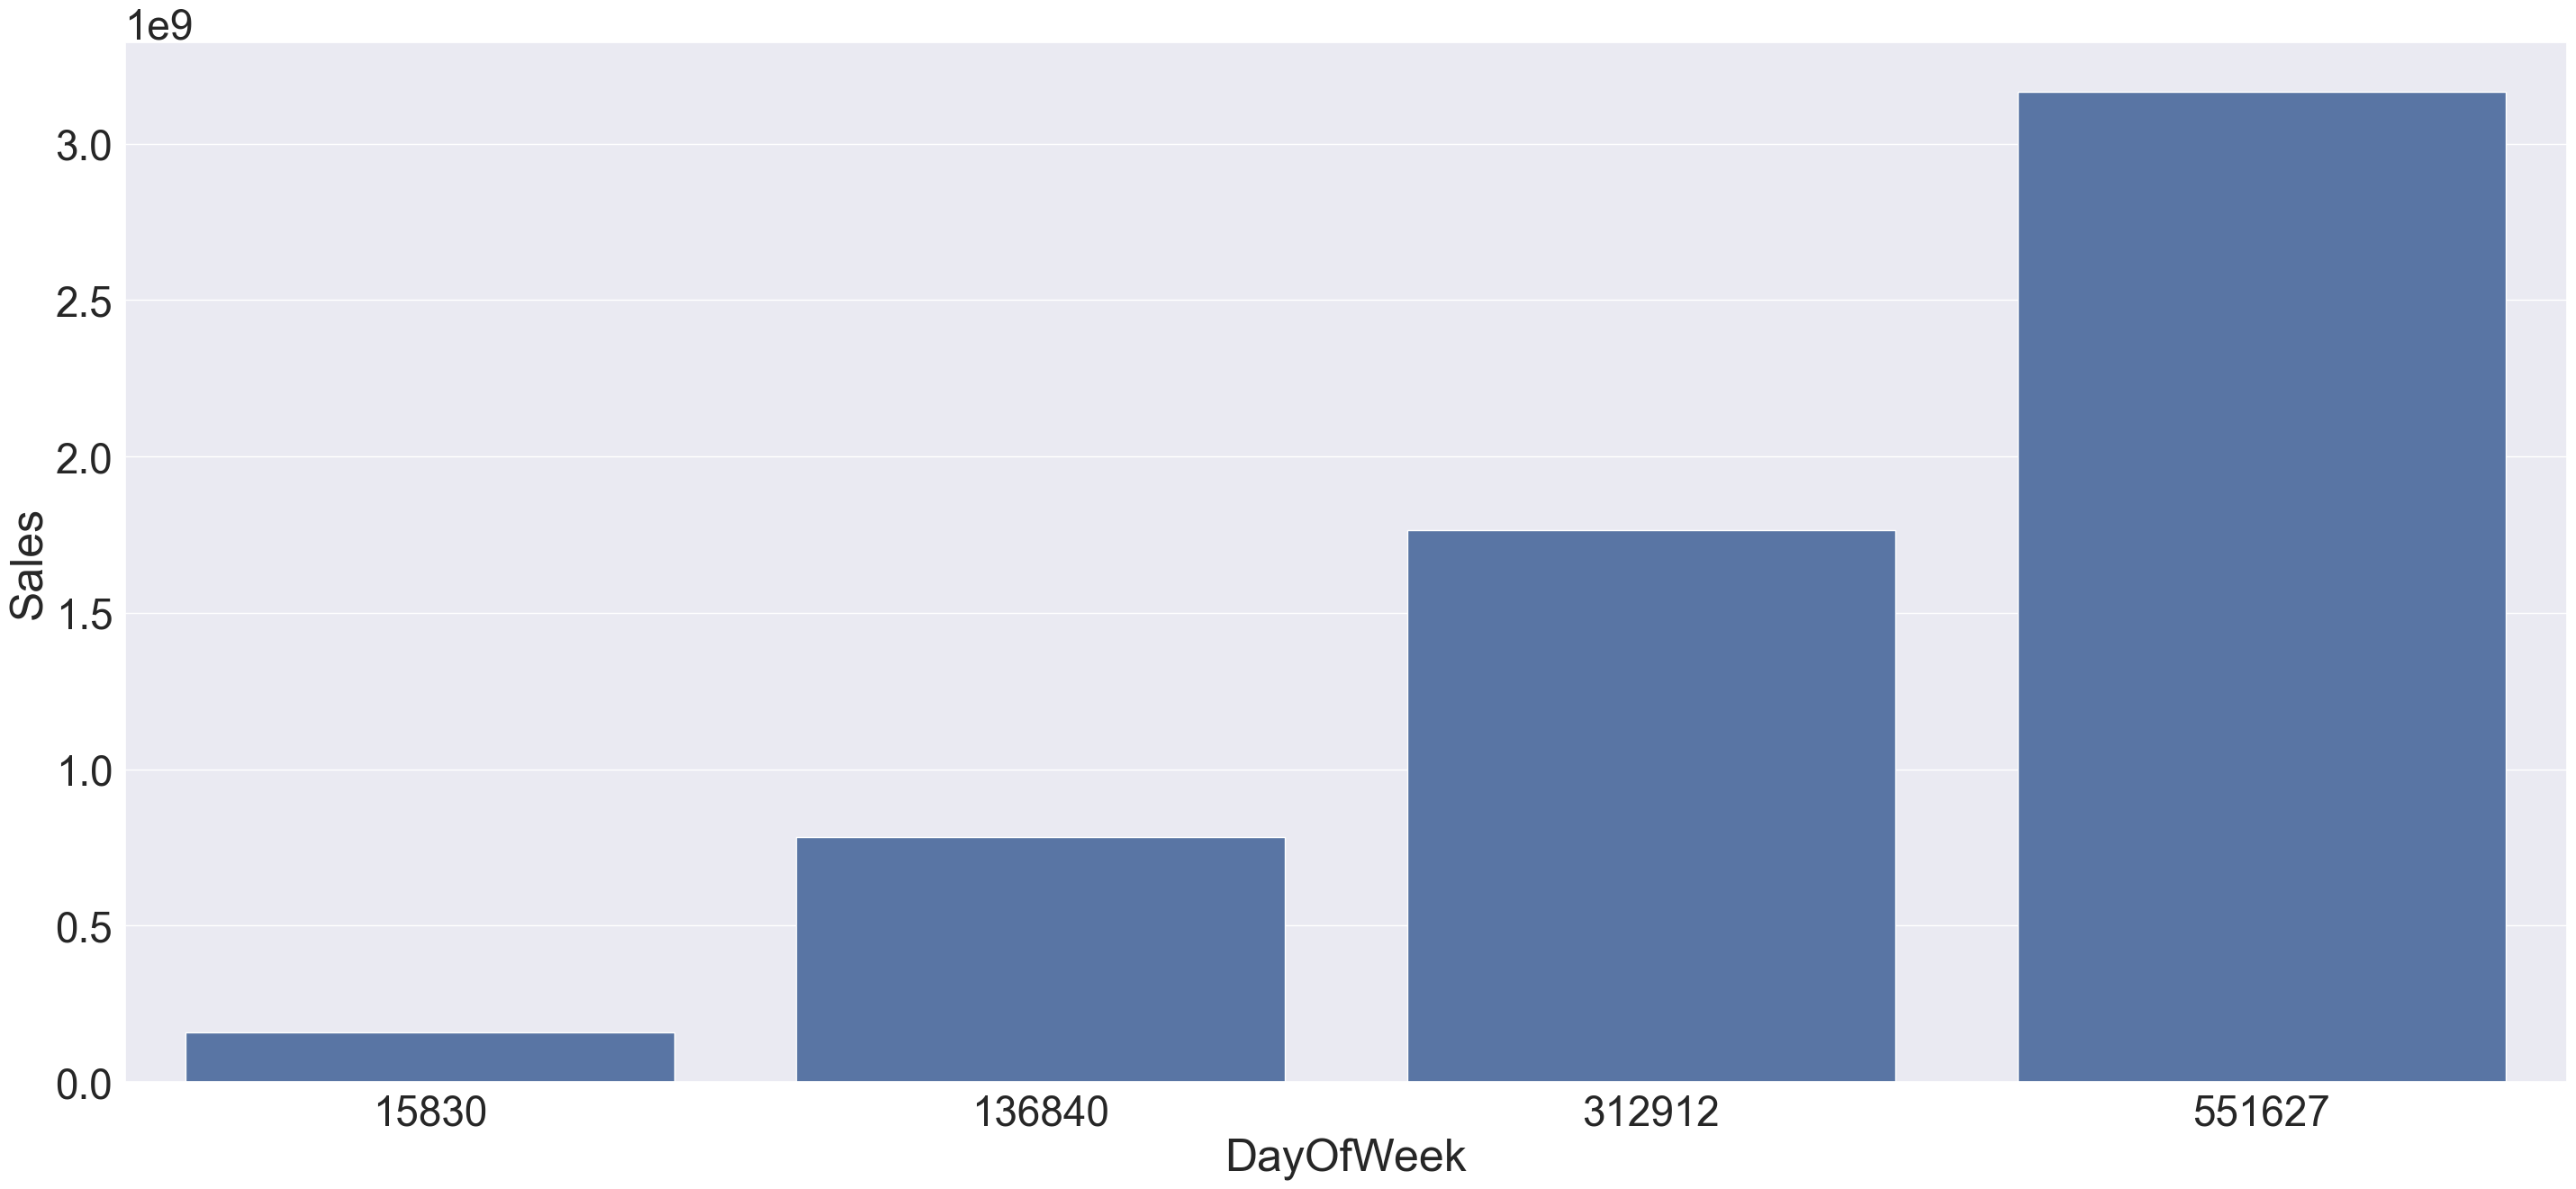

In [87]:
plt.figure(figsize=(35,15))
sns.barplot(x="DayOfWeek", y="Sales", data=weekday_data1)

#### Check how the assortment type affects sale

In [88]:
# extractng Assortment data to be used for this analysis
assort_data = train_store[['Assortment','Sales']]

In [89]:
assort_data.nunique()

Assortment        3
Sales         21734
dtype: int64

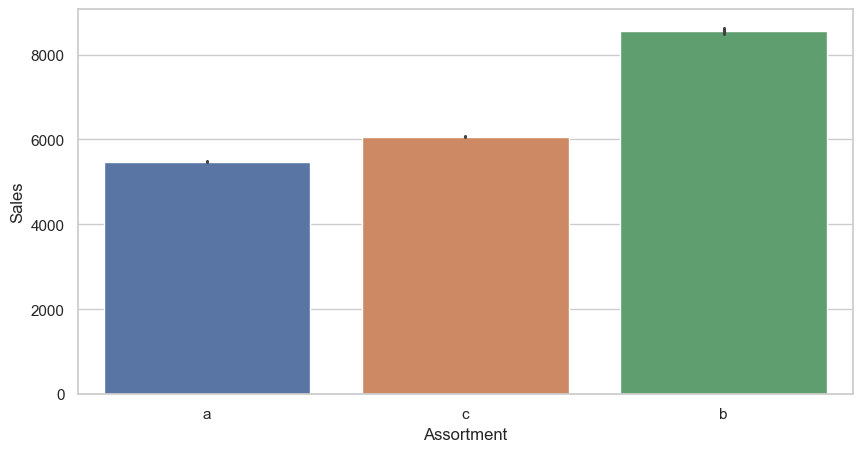

In [90]:
# visulazing the above data we use bar plot this Assortment is categorical
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x='Assortment',y='Sales',hue='Assortment',data=train_store)
plt.show()

Note:-Sales is Highest in Extra assortment type followed by Extended type.

#### How does the distance to the next competitor affect sales? What if the store and
its competitors all happen to be in city centres, does the distance matter in that
case

In [91]:
# Statistical Description of CompetitionDistance
round(train_store.CompetitionDistance.describe(),2)


count    1017209.00
mean        5422.03
std         7706.91
min           20.00
25%          710.00
50%         2330.00
75%         6880.00
max        75860.00
Name: CompetitionDistance, dtype: float64

The minimum, average, and Max. Distance to the Competitor store are 20, 5430 and 75860 distance units respectivelly.

In [92]:
sales = train_store[train_store.CompetitionDistance <= 710.00].Sales.sum()
sales1 = train_store[train_store.CompetitionDistance > 710.00][train_store.CompetitionDistance <= 2330.00].Sales.sum()
sales2 = train_store[train_store.CompetitionDistance > 2330.00][train_store.CompetitionDistance <= 6890.00].Sales.sum()
sales3 = train_store[train_store.CompetitionDistance > 6890.00].Sales.sum()

print(sales, sales1, sales2, sales3)

1556041436 1474720820 1406225904 1436192463


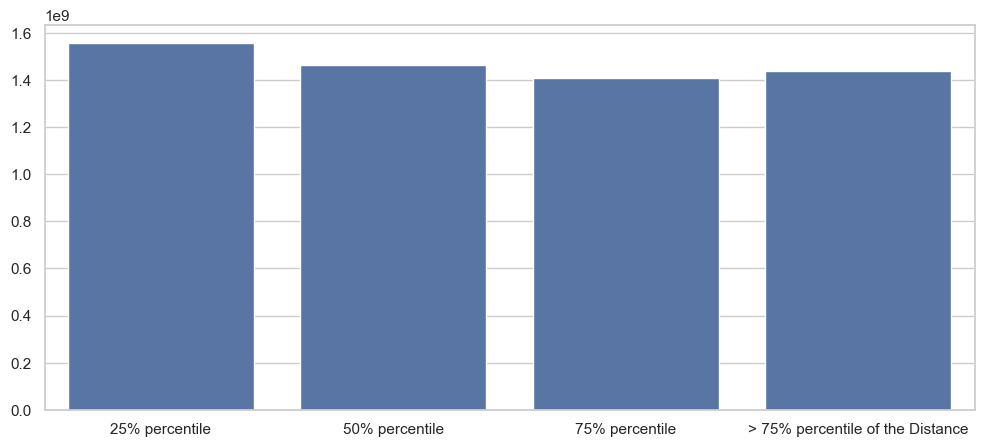

In [93]:
sales_distance = [1556041436, 1462736991, 1406225904, 1436192463]
slaes_names = ['25% percentile','50% percentile','75% percentile', '> 75% percentile of the Distance' ]
plt.figure(figsize=(12,5))
sns.set(style="whitegrid")
sns.barplot(y=sales_distance, x=slaes_names)
plt.show()

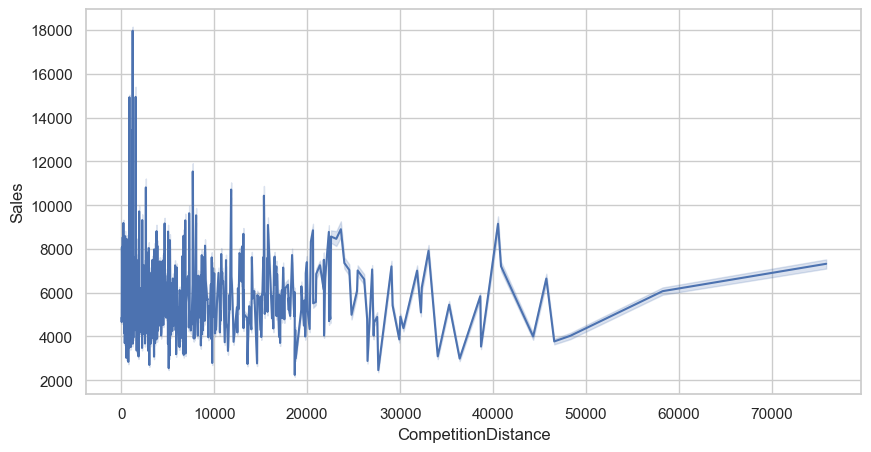

In [94]:
# CompetitionDistance
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.lineplot(x='CompetitionDistance',y='Sales',data=train_store)
plt.show()

Note:-From the above graphs (2 graphs above), the Competitor distance slightly affect the Sales inversely, that is, when the distance increases, the sales slightly decreases.

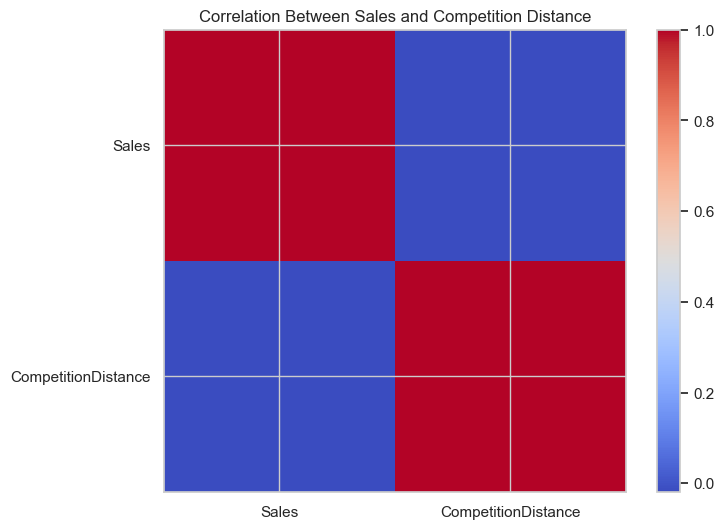

In [95]:
columns = train_store[['Sales', 'CompetitionDistance']]
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.imshow(columns.corr(), cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Between Sales and Competition Distance')
plt.xticks(range(len(columns.columns)), columns.columns)
plt.yticks(range(len(columns.columns)), columns.columns)
plt.show()

Insight :-> The more the closer the stores the higher the sales, and the more the distant the lower the sales.

#### How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance

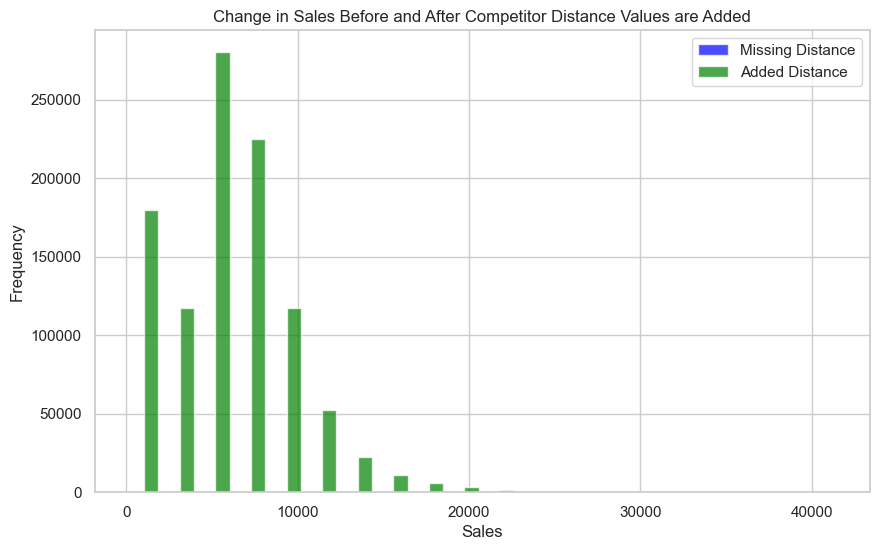

In [96]:

# 1. Filter stores with missing competitor distance values
stores_with_missing_distance = train_store[train_store['CompetitionDistance'].isnull()]

# 2. Check if competitor distance values are later added
stores_with_added_distance = train_store[~train_store['CompetitionDistance'].isnull()]

# 3. Analyze the change in sales or customer behavior
# You can compare sales or customer behavior before and after competitor distance values are added
# For example, you can calculate average sales or customer count before and after
# You'll need sales or customer behavior data associated with store IDs

# For illustration, let's visualize the change in sales before and after competitor distance values are added
plt.figure(figsize=(10, 6))
plt.hist([stores_with_missing_distance['Sales'], stores_with_added_distance['Sales']], bins=20, color=['blue', 'green'], alpha=0.7, label=['Missing Distance', 'Added Distance'])
plt.title('Change in Sales Before and After Competitor Distance Values are Added')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [97]:
import logging
import logging.handlers
logging.basicConfig(filename='logfile.log', level=logging.INFO, filemode='w', format='%(asctime)s - %(levelname)s - %(message)s')

In [98]:
import logging

# Create a formatter
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')

# Create file handler and set formatter
file_handler = logging.FileHandler('example.log')
file_handler.setFormatter(formatter)

# Create console handler and set formatter
console_handler = logging.StreamHandler()
console_handler.setFormatter(formatter)

# Create logger and add handlers
logger = logging.getLogger('my_logger')
logger.addHandler(file_handler)
logger.addHandler(console_handler)

# Example usage
logger.setLevel(logging.DEBUG)
logger.debug('This is a debug message')
logger.info('This is an info message')
logger.warning('This is a warning message')
logger.error('This is an error message')
logger.critical('This is a critical message')

2024-04-09 02:07:22,319 - DEBUG - This is a debug message
DEBUG:my_logger:This is a debug message
2024-04-09 02:07:22,322 - INFO - This is an info message
INFO:my_logger:This is an info message
2024-04-09 02:07:22,324 - WARNING - This is a warning message
2024-04-09 02:07:22,327 - ERROR - This is an error message
ERROR:my_logger:This is an error message
2024-04-09 02:07:22,327 - CRITICAL - This is a critical message
CRITICAL:my_logger:This is a critical message


In [99]:
def my_function():
    logger.info('Starting my_function...')

    try:
        # Your code logic here
        result = 10 / 2
        logger.info('Result: %s', result)
    except Exception as e:
        logger.error('An error occurred: %s', str(e))
    finally:
        logger.info('Finished my_function.')

In [100]:
if __name__ == "__main__":
    # Your main code here
    logger.info('Program started.')
    my_function()
    logger.info('Program finished.')

2024-04-09 02:07:22,351 - INFO - Program started.
INFO:my_logger:Program started.
2024-04-09 02:07:22,351 - INFO - Starting my_function...
INFO:my_logger:Starting my_function...
2024-04-09 02:07:22,351 - INFO - Result: 5.0
INFO:my_logger:Result: 5.0
2024-04-09 02:07:22,351 - INFO - Finished my_function.
INFO:my_logger:Finished my_function.
2024-04-09 02:07:22,358 - INFO - Program finished.
INFO:my_logger:Program finished.


In [101]:
logger.debug('this is debug')

2024-04-09 02:07:22,368 - DEBUG - this is debug
DEBUG:my_logger:this is debug


In [102]:
logger.info('this is info')

2024-04-09 02:07:22,376 - INFO - this is info
INFO:my_logger:this is info


In [103]:
logger.warning('this is warning')

2024-04-09 02:07:22,393 - WARNING - this is warning


In [104]:
logger.error("This is error")

2024-04-09 02:07:22,401 - ERROR - This is error
ERROR:my_logger:This is error


In [105]:
logger.critical('this is critical')

2024-04-09 02:07:22,417 - CRITICAL - this is critical
CRITICAL:my_logger:this is critical
